<a href="https://colab.research.google.com/github/KDcodePy/Sales-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction

Name: Kim Hazed Delfino

## Imports

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import set_config
set_config(display='diagram')


## Loading Data 


In [88]:
filename = r"C:\Users\kdelfino\Documents\GitHub\Sales-prediction\sales_predictions_2023.csv"

In [89]:
df = pd.read_csv(filename)


In [90]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning
- checking how many Rows and Columns:

In [92]:
df.shape

(8523, 12)

- checking for data types and non-null counts:

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Duplicated Data
- checking for duplicates in our data:

In [94]:
df.duplicated().sum()

0

### Missing Data
-checking for missing values in our data:

In [95]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [96]:
df["Item_Weight"].fillna(0,inplace=True)

- Since almost all of the unique `Item_Identifier` occurred multiple times, we can just get the `mean value` of that `Item_Identifier` and apply it on `NaN`.
- Replaced all the `NaN` values into `0` values so i can reference them inside my for loop



In [97]:
counter = 0
print("Working on my magic", end='')
for item in df['Item_Identifier']:
  if  df.iloc[counter,1] == 0:
    df.iat[counter,1]=df[df["Item_Identifier"] == item]["Item_Weight"].mean()

  if counter % 100 == 0:
    print(".",end='')
  counter += 1
print("Done!") 


Working on my magic......................................................................................Done!


In [98]:
df[df["Item_Weight"] == 0]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,0.0,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,0.0,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,0.0,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- we still have 4 rows that has `0` values, this night cause some issues on our prediction later down the line so we can just change it into `median` values of the entire column.

In [99]:
index_list = [927,1922,4187,5022]

- Created a `list of index` with all the rows that still has `0` values so i can just loop through the list and use it as index value for .iloc
- changed the `0` values into `median` values of the entire column.

In [100]:
for index in index_list:  
  df.iloc[index,1] = df["Item_Weight"].median()

In [101]:
df[df["Item_Weight"] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [102]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- replaced `NaN` values with `Missing` values for the 2410 rows since it's more than 2% and less than 80% of the entire dataset for us to consider deleting the column.

In [103]:
df["Outlet_Size"].fillna("Missing", inplace=True) 

In [104]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Inconsistency 
- checking for any inconsistency on our data:

In [105]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [106]:
df.replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)

- fixed the name formatting on `LF, reg, and low fat` stay consistent with `Low Fat` and `Regular` 

In [107]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Checking the Min, Avg and Max values in all of the Columns with numerical values:

In [109]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.372472,0.066132,140.992782,1997.831867,2181.288914
std,4.633512,0.051598,62.275067,8.371760,1706.499616
min,1.800000,0.000000,31.290000,1985.000000,33.290000
25%,8.365000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.200000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [110]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Visualization


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Visualization & Analysis

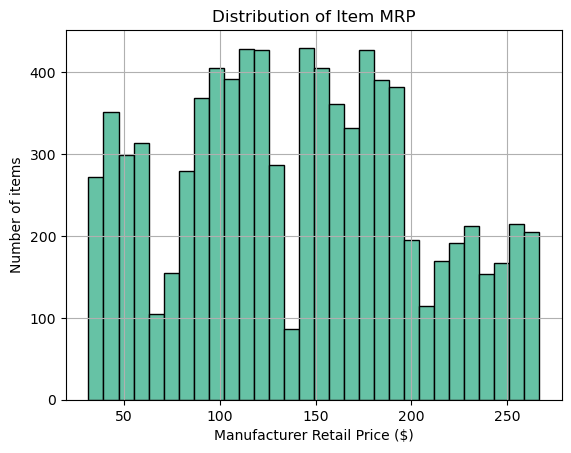

In [112]:
ax = df["Item_MRP"].hist(bins= 30, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Manufacturer Retail Price ($)')
ax.set_ylabel('Number of items');


  - Here we can see that majority of items in our dataset are within $100~200 Price range.

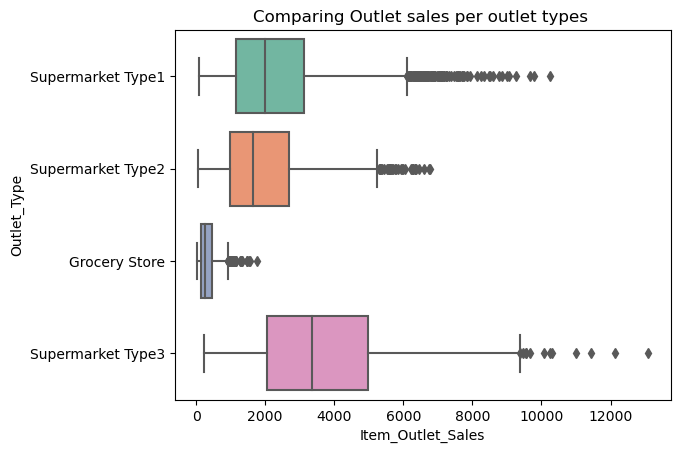

In [113]:
ax = sns.boxplot(x="Item_Outlet_Sales" , y= "Outlet_Type", data=df)
ax.set_title("Comparing Outlet sales per outlet types ");

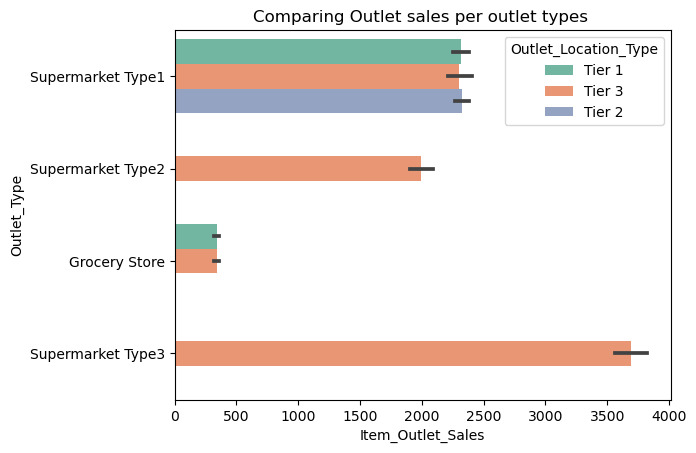

In [114]:
ax = sns.barplot(data=df, x="Item_Outlet_Sales", y="Outlet_Type",hue="Outlet_Location_Type")
ax.set_title("Comparing Outlet sales per outlet types ");


  - Here we can see that Supermarket Type3 on Location Tier3 is outperforming other types in terms of average sales 


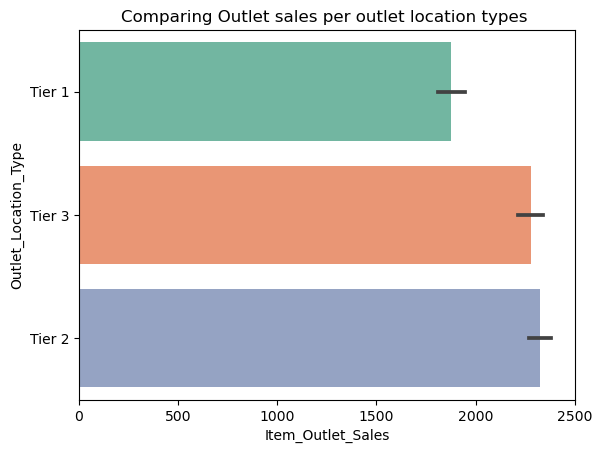

In [115]:
ax = sns.barplot(data=df, x="Item_Outlet_Sales", y="Outlet_Location_Type")
ax.set_title("Comparing Outlet sales per outlet location types ");

- Here we can see that Tier2 outlet location type is outperforming Tier1 and Tier3 in terms of average sales 

In [116]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))

C:\Users\kdelfino\AppData\Local\Temp\ipykernel_11992\3818062305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


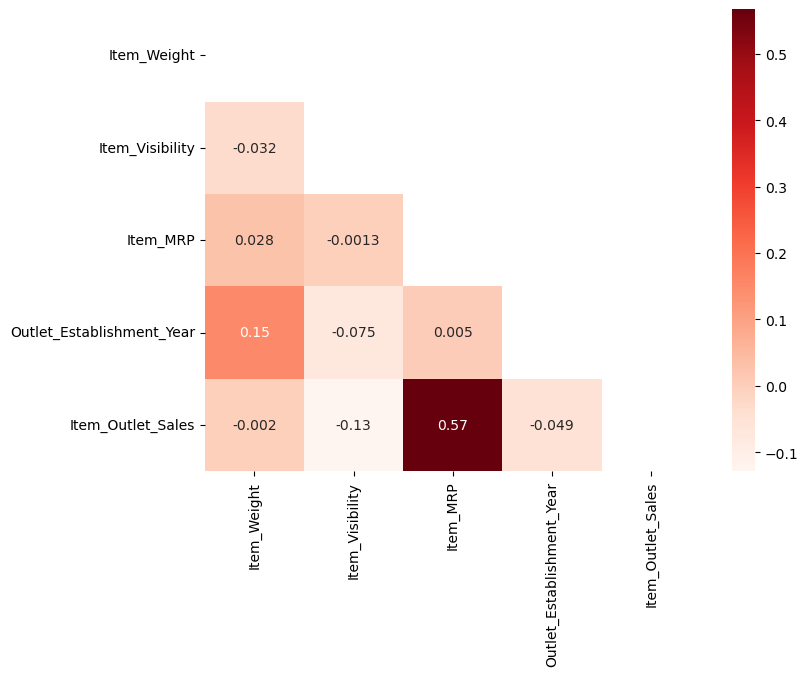

In [117]:
fix, ax = plt.subplots(figsize= (8,6))
ax = sns.heatmap(corr, cmap='Reds', annot = True, mask=mask);

- Here we can see that Item_MRP has moderate correlation with Item_Outlet_Sales 

## Explanatory Visualization & Analysis

### Possible Questions to answer:

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [119]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### what Item type sells the most and least?


In [120]:
ityp = df.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)
ityp

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

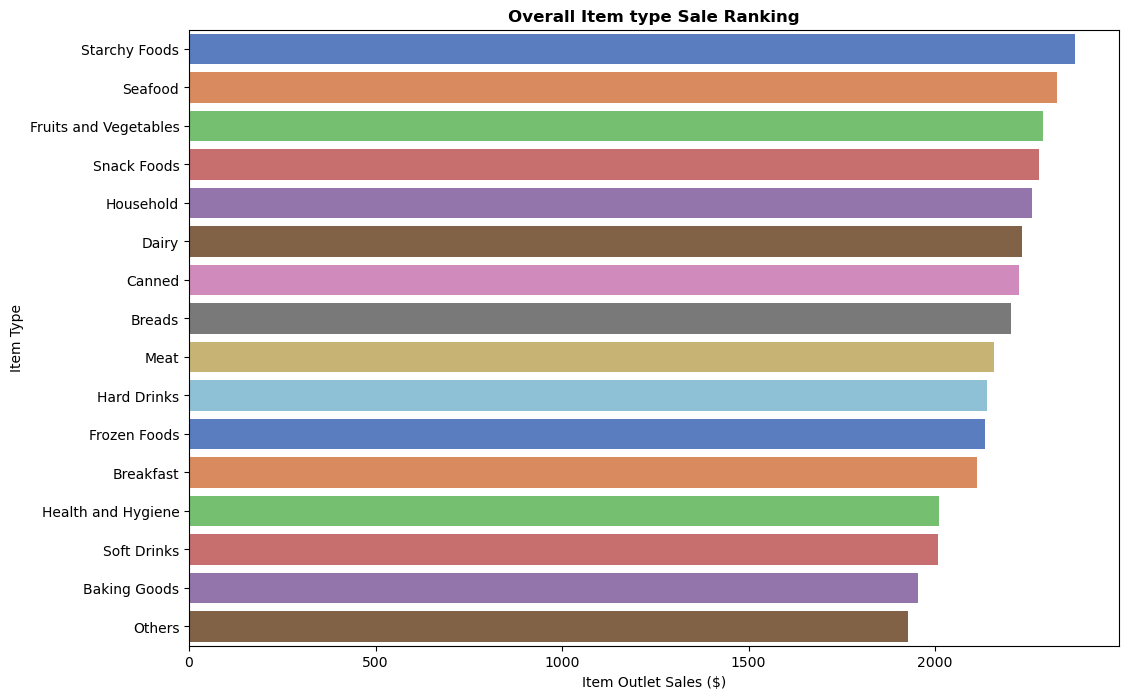

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette('muted',len(df))
sns.barplot(data=df,x='Item_Outlet_Sales' , y= 'Item_Type', order= ityp.index,errorbar= None)
ax.set_xlabel('Item Outlet Sales ($)')
ax.set_ylabel("Item Type")
ax.set_title('Overall Item type Sale Ranking', fontsize = 12, fontweight= 'bold');

The top three highest Item sale average:
- Starchy Foods
- Seafood
- Fruits and Vegetables 

The bottom three lowest Item sale average:
- Soft Drinks
- Baking Goods
- Others

#### Which Outlets is performing well?


In [122]:
outlet_ranking = df.groupby("Outlet_Identifier")['Item_Outlet_Sales'].mean().sort_values(ascending = False)
outlet_ranking

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

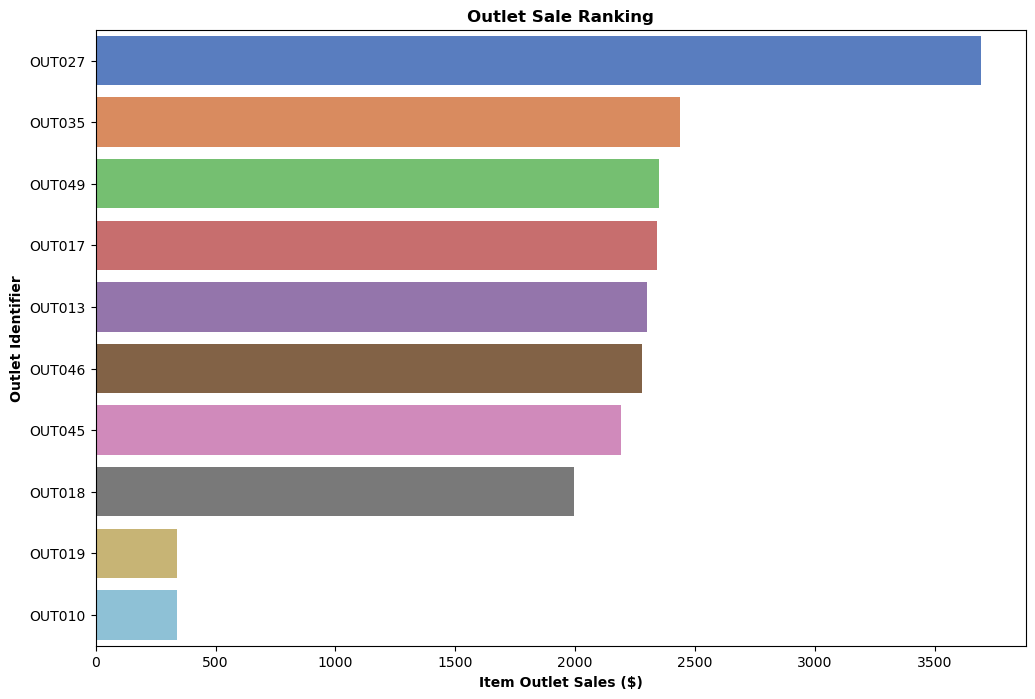

In [123]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df,x='Item_Outlet_Sales' , y= 'Outlet_Identifier', order= outlet_ranking.index,errorbar= None)

ax.set_xlabel('Item Outlet Sales ($)', fontsize=10, fontweight='bold')
ax.set_ylabel("Outlet Identifier", fontsize=10, fontweight='bold')
ax.set_title('Outlet Sale Ranking', fontsize = 12, fontweight= 'bold');

- OUT27 is outperforming the other outlets in terms of average sales 

### What are the best seller item types in the top1 outlet?


In [124]:
top_outlet = df[df['Outlet_Identifier']=='OUT027']
grouped_top = top_outlet.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

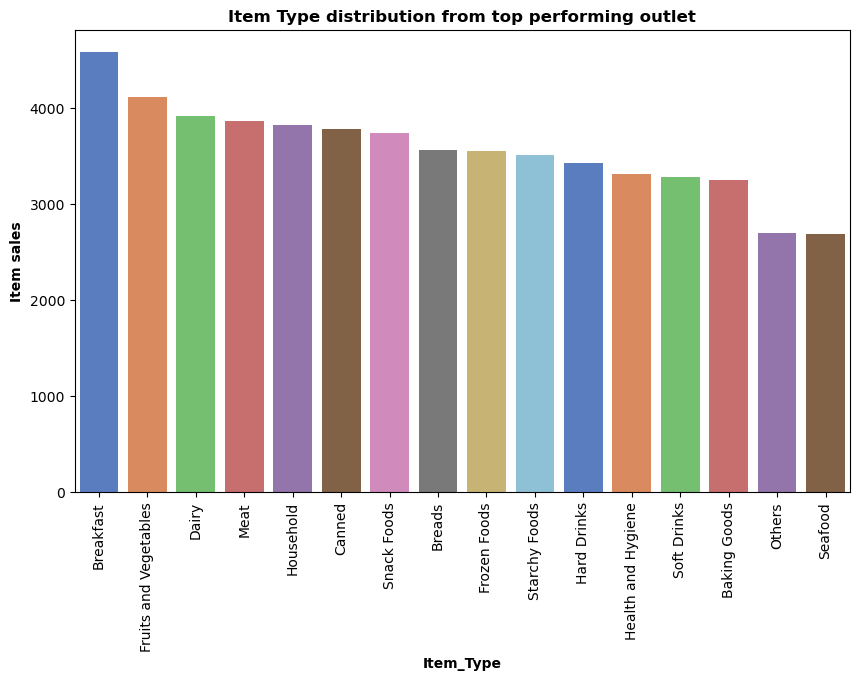

In [125]:
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=top_outlet,x='Item_Type', y ='Item_Outlet_Sales',order=grouped_top.index,errorbar=None)
sns.set_palette('Set2',len(top_outlet))
plt.xticks(rotation = 90)
ax.set_title('Item Type distribution from top performing outlet', fontsize = 12, fontweight = 'bold');
ax.set_xlabel('Item_Type', fontsize = 10, fontweight = 'bold')
ax.set_ylabel('Item sales', fontsize = 10, fontweight = 'bold');


- Best selling item types in top performing outlet are:
  - Breakfast
  - Fruits and Vegetable
  - Dairy

# Preprocessing for Machine learning 

## Reloading the Data 

In [126]:
df1 = pd.read_csv(filename)

## Data Exploration

In [127]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [129]:
#check for missing values
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [130]:
#check for duplicates in dataset
df1.duplicated().sum()

0

In [131]:
#check for inconsistency
df1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [132]:
#relace inconsistent values in our dataset
df1.replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)

- replace name formatting for consistency

In [133]:
#double checking for inconsistency
df1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Preprocessing 

In [134]:
df1["Item_Identifier"].nunique()

1559

In [135]:
#drop target excessive unique data to reduce ohe process
X = df1.drop(columns=['Item_Outlet_Sales',"Item_Identifier"])
y = df1["Item_Outlet_Sales"]
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


- Ordinal features are : `None` , based on Exploratory Data Analysis we stablished that `Outlet_Location_Type` Tier1 has no clear advantage vs Tier 2 or 3 and vise-versa so we're putting them categorical features instead.

- Categorical features are : `Item_Identifier, Item_Fat_content, Item_Type, Outlet_Identifier, Outlet_Size , Outlet_Location_Type, Outlet_Type`

- Numerical features are : `Item_Weight, Item_Visibility, Item_MRP`

In [137]:
test_df = df1[df1["Item_Weight"].isna()]
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [138]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [139]:
#replacing NaN values with 0 value because == np.nan was somehow not working
df1["Item_Weight"].fillna(0,inplace=True)
counter = 0
#iterate through the dataset
for item in df1["Item_Type"]:  
  if  df1.iat[counter,1] == 0:
    #replace the zero values(prev. NaN values) to X_train mean value
    df1.iat[counter,1]=X_train[X_train["Item_Type"] == item]["Item_Weight"].mean()
  counter += 1


In [140]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Instantiate Column Selector


In [141]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instantiate Tranformers

In [212]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False,drop='if_binary')
mean_imputer = SimpleImputer(strategy='mean')
const_imputer = SimpleImputer(strategy='constant',fill_value='missing_value')

## Instantiate Pipeline

In [213]:
num_pipe = make_pipeline(mean_imputer)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [214]:
cat_pipe = make_pipeline(const_imputer,ohe)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing_value',
                               strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse=False))])

## Instantiate ColumnTransformer

In [215]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple, verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001D8F9142BE0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing_value',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001D8F9142E20>)],
                  verbose_feature_names_out=False)

## Transformer Data

In [181]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001D8F9142BE0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing_value',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001D8F9142E20>)],
                  verbose_feature_names_out=False)

In [182]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Inspecting Results

In [183]:
print(np.isnan(X_train_processed).sum().sum(),"Missing values in training data")
print(np.isnan(X_test_processed).sum().sum(),'Missing values in testing data')
print()
print(f"All Data in X_train_processed are {X_train_processed}")
print(f"All Data in X_test_processed are {X_test_processed}")
print()
print(f"Shape of Data is {X_train.shape}")
print()
X_train_processed

0 Missing values in training data
0 Missing values in testing data

All Data in X_train_processed are [[ 0.81724868 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.5563395  -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.13151196  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.11373638 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.76600931 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.81724868 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]
All Data in X_test_processed are [[ 0.33100885 -0.77664625 -0.99881554 ...  1.          0.
   0.        ]
 [-1.17989246  0.1003166  -1.58519423 ...  1.          0.
   0.        ]
 [ 0.37844688 -0.48299432 -1.59578435 ...  1.          0.
   0.        ]
 ...
 [-1.13957013  1.21832428  1.09397975 ...  1.          0.
   0.        ]
 [-1.49772727 -0.77809567 -0.36679966 ...  1.          0.
   0.        ]
 [ 0.52076098 -0.77976293  0.11221189 ...  1.      

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

## Creating custom function to initialize the model

- adding bagreg and rf models for future testing/comparing

In [184]:
#functionizing best_params_finder to eliminate repeating code
def get_best_param(model, X_train, X_test, y_train, y_test, params:list, cols:list) :

    #creates the pd df  
    mode_score =  pd.DataFrame(index=params, columns=cols)
    
    #loop through given parameters
    for param in params:
        #instantiate the model
        if model == "dec_tree":
            op_model = DecisionTreeRegressor(max_depth= param, random_state=42)
            
        elif model == "bagreg":
            op_model = BaggingRegressor(n_estimators=param, random_state=42)
      
        elif model == "rf":
            op_model = RandomForestRegressor(max_depth=param, random_state=42)
      
        else:
            print(f"Invalid model {model} please try 'dec_tree, bagreg, or rf'")
        #train the model
        op_pipe = make_pipeline(preprocessor,op_model)
        op_pipe.fit(X_train,y_train)    
        #store data into the DataFrame
        train_score = op_pipe.score(X_train, y_train)
        test_score = op_pipe.score(X_test, y_test)
        train_pred = op_pipe.predict(X_train)
        test_pred = op_pipe.predict(X_test)
        mode_score.loc[param,cols[1]] = train_score
        mode_score.loc[param,cols[0]] = test_score   

    # returns only best score for given parameters
    best_param_df = mode_score.sort_values(by=cols[0], ascending=False).head(1)
    #store the best param in a variable
    best_param = best_param_df.index
    best_param_df["Best Param"] = best_param
    return best_param_df.set_index("Best Param")


 

In [185]:
   #use best param to tune hyperparameter and score metrics
def get_metrics(model, param):

    if model == "dec_tree":
      op_model_best = DecisionTreeRegressor(max_depth= param, random_state=42)
        
    elif model == "bagreg":
        op_model_best = BaggingRegressor(n_estimators= param, random_state=42)

    elif model == "rf":
        op_model_best = RandomForestRegressor(max_depth=param, random_state=42)
    elif model == "reg":
      op_model_best = LinearRegression()
    op_pipe_best = make_pipeline(preprocessor,op_model_best)
    #train the model
    op_pipe_best.fit(X_train,y_train)    
    
    train_pred_best = op_pipe_best.predict(X_train)
    test_pred_best = op_pipe_best.predict(X_test)

    #create scoring table
    metrics = [{
        "model" : model, 
        
        "test r-squared Score" : round(r2_score(y_test, test_pred_best),3),
        "train r-squared Score" : round(r2_score(y_train, train_pred_best),3), 

        "test_MAE Score": round(mean_absolute_error(y_test, test_pred_best),2),
        "train_MAE Score" : round(mean_absolute_error(y_train,train_pred_best),2),

        "test_MSE Score" : round(mean_squared_error(y_test,test_pred_best),2),
        "train_MSE Score" : round(mean_squared_error(y_train,train_pred_best),2),
        
        "train_RMSE Score" : round(mean_squared_error(y_train, train_pred_best, squared=False),2),
        "test_RMSE Score" : round(mean_squared_error(y_test,test_pred_best, squared=False),2)

    }]

    temp_pd = pd.DataFrame.from_dict(metrics)
    
    indexed_df = temp_pd.set_index("model")
    return indexed_df

In [186]:
#Create pipeline
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor,reg)

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D8F9142BE0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing_value',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D8F9142E20>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [187]:
#get Linear Regressor metric scores
reg_scores = get_metrics("reg", 0)
reg_scores

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
reg,0.567,0.562,804.12,847.13,1194349.78,1297558.4,1139.1,1092.86


In [188]:
#Instantiate dec_tree model metric scores
dec_tree_depths = list(range(2, 36))
dec_tree_cols =  ["dec_tree_test_score","dec_tree_train_score"]
op_dec_tree = get_best_param("dec_tree", X_train, X_test, y_train , y_test, dec_tree_depths, dec_tree_cols)

In [189]:
#best tune for max_depth parameter
op_dec_tree

,dec_tree_test_score,dec_tree_train_score
Best Param,,
5,0.59471,0.60394


In [190]:
#get Decision Tree Regressor model metric scores
dt_best_scores = get_metrics("dec_tree", 5)
dt_best_scores

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
dec_tree,0.595,0.604,738.32,762.61,1118185.97,1172122.77,1082.65,1057.44


In [191]:
final_score = pd.concat([dt_best_scores,reg_scores])
final_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
dec_tree,0.595,0.604,738.32,762.61,1118185.97,1172122.77,1082.65,1057.44
reg,0.567,0.562,804.12,847.13,1194349.78,1297558.40,1139.10,1092.86


## Model Evaluation



- Over all Decision Tree regressor model is consistently outperforming Linear regressor model in this dataset
- If only these two models in mind, I recommend using the Decision Tree Regressor model because it outperforms Linear regressor on RMSE score (lower the better) and R2 (higher the better) and Decision tree model still have room to fine tune its hyperparameters 


## Exploring other models

In [192]:
#Instantiate RandomForest Regressor
rf_depths = list(range(2,42))
rf_cols = ["rf_train_score", "rf_test_score"]
rf_get_best = get_best_param("rf", X_train, X_test, y_train, y_test , rf_depths, rf_cols)
rf_get_best

,rf_train_score,rf_test_score
Best Param,,
5,0.602608,0.61054


In [193]:
rf_best_score = get_metrics("rf", 5)
rf_best_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
rf,0.603,0.611,728.39,755.38,1096396.5,1152588.68,1073.59,1047.09


In [194]:
#Instantiate Bagging Regressor
bagreg_est = list(range(10,100,10))
bagreg_cols = ["bagreg_test_score", "bagreg_train_score"]
bagreg_get_best = get_best_param("bagreg", X_train, X_test, y_train, y_test, bagreg_est,bagreg_cols)
bagreg_get_best

,bagreg_test_score,bagreg_train_score
Best Param,,
90,0.559972,0.937915


In [195]:
bagreg_best_score = get_metrics("bagreg", 90)
bagreg_best_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
bagreg,0.56,0.938,766.58,296.69,1214028.38,183738.52,428.65,1101.83


In [196]:
#get final score
final_score = pd.concat([rf_best_score,bagreg_best_score, dt_best_scores,reg_scores])
final_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
rf,0.603,0.611,728.39,755.38,1096396.50,1152588.68,1073.59,1047.09
bagreg,0.560,0.938,766.58,296.69,1214028.38,183738.52,428.65,1101.83
dec_tree,0.595,0.604,738.32,762.61,1118185.97,1172122.77,1082.65,1057.44
reg,0.567,0.562,804.12,847.13,1194349.78,1297558.40,1139.10,1092.86


- Here we can see that by using more complex models we did better performance and shift the bias:variance ratio more towards variance(better fit) or more complex model can better find the patterns in this dataset

# Project 1 Revisited 

## Imports

In [197]:
from sklearn import metrics
import joblib

### Custom functions

In [198]:
# Function to evaluate model
def evaluate_regression(model, X_train,y_train, X_test, y_test): 

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [233]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False, 
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    ## return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

In [232]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing_value,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.30,0.026300,79.4302,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,7.93,0.071136,42.7086,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,14.50,0.041313,42.0454,1999.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Linear Regression

### Evaluate model performance on training and test data

In [221]:
# Instantiate model and fit X_train_df
linreg = LinearRegression()

linreg.fit(X_train_df, y_train)

# Evaluate model 
evaluate_regression(linreg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1139.10
Test Data:	R^2= 0.57	RMSE= 1092.86


### Visualize model coefficients

In [219]:
coeffs = pd.Series(linreg.coef_, index=feature_names,
                        name='Coefficients')

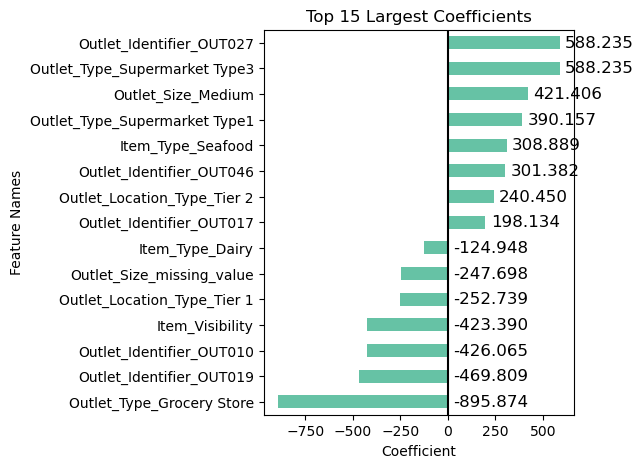

In [220]:
plot_coeffs(coeffs,top_n=15,intercept=False,annotate=True);

#### The 3 largest coefficients are for

- "Outlet_Identifier_OUT027" for every item outlet_027 have, their predicted  Item_outlet_sale Increases by $588.235 
- "Outlet_Type_Supermarket Type3" items sold in Supermarket Type3 increases the Item_outlet_sale average by $588.235 (similar value to OUT027 because OUT027 is the only Supermarket Type3 in the Dataset)
- "Outlet_Size_Medium" Items sold in Outlet size medium adds Item_Outlet_sale avg by $421.406

## RandomForest Regressor

In [235]:
# Instantiate and fit model 
rfreg = RandomForestRegressor()
rfreg.fit(X_train_df,y_train)

# Evaluate model
evaluate_regression(rfreg,X_train_df,y_train,X_test_df,y_test)

Training Data:	R^2= 0.94	RMSE= 427.19
Test Data:	R^2= 0.56	RMSE= 1106.79


### Extract and Plot the Feature Importances

In [236]:
feature_importance = pd.Series(rfreg.feature_importances_, index=feature_names,
                        name='RandomForestRegressor Feature Importances')
feature_importance.head()

Item_Weight                  0.053807
Item_Visibility              0.097183
Item_MRP                     0.442852
Outlet_Establishment_Year    0.024150
Item_Fat_Content_Regular     0.008816
Name: RandomForestRegressor Feature Importances, dtype: float64

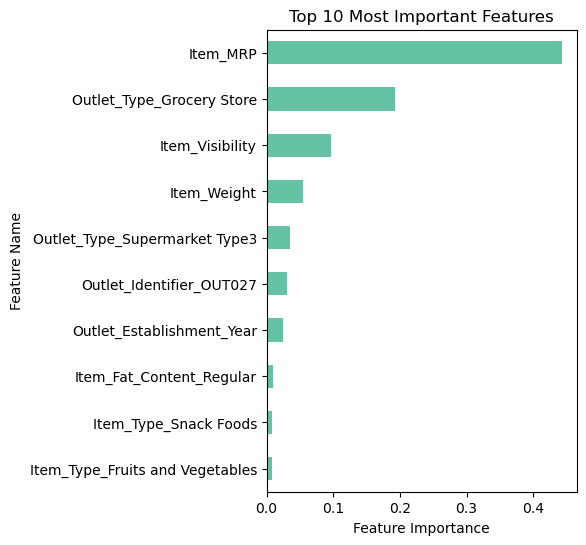

In [237]:
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

What were your 5 most important features?

- The top 5 most important features are:
    - item_MRP - single most important
    - Outlet_Type_Grocery Store - 2nd most important
    - Item_Visibility - somewhat important
    - Item_Weight - somewhat important
    - Outlet_Type_Supermarket Type3 - somewhat important

## Saving Models & Objects with joblib

In [239]:
# Create Dic for variables 
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'LinearRegression':linreg,
         'RandomForest':rfreg}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']